In [1]:
import numpy as np
from matplotlib import pyplot as plt

import M8195A as awg
awg_ip = "192.168.0.249"

from sigproc_kit import *

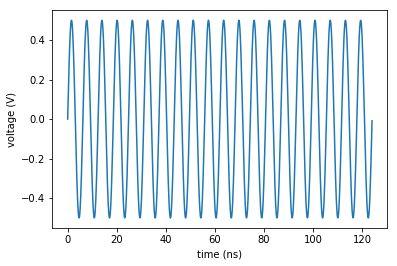

target ip : 192.168.0.249
connect to device ...
*IDN?
Keysight Technologies,M8195A,DE57700138,4.0.0.0-1
success!
NOTE: overriding sample rate to match desired period!
attempting to set sample rate : 64970892000.000000 Hz
success!
preparing data for channel 3
sending data ...
set output voltage ...
Output 3 on ...
RUN!
close socket


In [8]:
##################################################
##              maxi clock signal               ##
##################################################


clk_freq = 161.138125e6

clk_period = 1./clk_freq

period = 20*clk_period

x=np.arange(0,period,0.1e-9)


y = 0.5*np.sin(2*np.pi*clk_freq*x)


plt.plot(x*1e9,y)
plt.xlabel("time (ns)")
plt.ylabel("voltage (V)")
plt.show()

awg.send_data(x,y*1,
              trace=3,
              ip=awg_ip,
              period=period)

#awg.send_data(x,y,
#              trace=2,
#              ip=awg_ip,
#              period=period)

In [11]:
##################################################
##               reference pulse                ##
##################################################

awg.pulser(
    trace=1,
    ip=awg_ip,
    on_val=300e-3,
    width=50e-9,
    leading_edge=2e-9,
    trailing_edge=2e-9,
    delay=0e-9,
    period=period
)

target ip : 192.168.0.250
connect to device ...
*IDN?
Keysight Technologies,M8195A,DE57700132,4.0.0.0-1
success!
NOTE: overriding sample rate to match desired period!
attempting to set sample rate : 64896000000.000000 Hz
success!
preparing data for channel 1
sending data ...
set output voltage ...
Output 1 on ...
RUN!
close socket


In [7]:
##################################################
##               reference pulse                ##
##################################################

awg.pulser(
    trace=1,
    ip=awg_ip,
    on_val=300e-3,
    width=10e-9,
    leading_edge=.05e-9,
    trailing_edge=.05e-9,
    delay=0e-9,
    period=period
)

target ip : 192.168.0.250
connect to device ...
*IDN?
Keysight Technologies,M8195A,DE57700132,4.0.0.0-1
success!
NOTE: overriding sample rate to match desired period!
attempting to set sample rate : 64896000000.000000 Hz
success!
preparing data for channel 1
sending data ...
set output voltage ...
Output 1 on ...
RUN!
close socket
